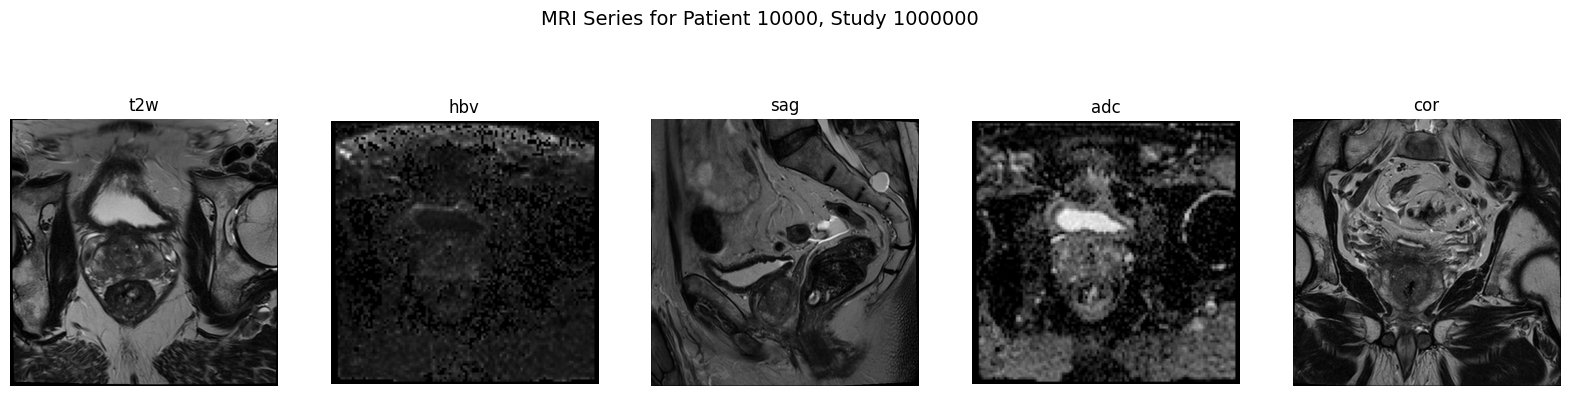

Patient 10000, Study 1000000 → case_ISUP = 0


In [1]:
# --- MRI Visualization Notebook ---

import os
import SimpleITK as sitk
import matplotlib.pyplot as plt
import pandas as pd

# --- Config ---
FOLDER = "/Users/emma/Desktop/QUEENS/THESIS/contrastive/mri_data/images/10000"
CSV_PATH = "/Users/emma/Desktop/QUEENS/THESIS/contrastive/mri_data/picai_labels/clinical_information/marksheet.csv"

first_file = sorted([f for f in os.listdir(FOLDER) if f.endswith(".mha")])[0]
# e.g. "10000_1000000_adc.mha"
parts = first_file.split("_")
PATIENT_ID = int(parts[0])
STUDY_ID = int(parts[1])


# --- Step 1: Visualize all MRI series ---
def load_mri(path):
    """Load an .mha file and return a middle slice as numpy array."""
    img = sitk.ReadImage(path)
    arr = sitk.GetArrayFromImage(img)  # shape: [slices, H, W]
    mid_slice = arr[arr.shape[0] // 2]
    return mid_slice

# Collect all series in the folder
files = [f for f in os.listdir(FOLDER) if f.endswith(".mha")]

fig, axes = plt.subplots(1, len(files), figsize=(20, 5))
for ax, f in zip(axes, files):
    img_path = os.path.join(FOLDER, f)
    mid_slice = load_mri(img_path)
    ax.imshow(mid_slice, cmap="gray")
    ax.set_title(f.split("_")[-1].replace(".mha", ""))
    ax.axis("off")

plt.suptitle(f"MRI Series for Patient {PATIENT_ID}, Study {STUDY_ID}", fontsize=14)
plt.show()

# --- Step 2: Read ISUP grade from marksheet.csv ---
df = pd.read_csv(CSV_PATH)

row = df[(df["patient_id"] == PATIENT_ID) & (df["study_id"] == STUDY_ID)]
if not row.empty:
    case_isup = row["case_ISUP"].values[0]
    print(f"Patient {PATIENT_ID}, Study {STUDY_ID} → case_ISUP = {case_isup}")
else:
    print(f"No entry found in marksheet.csv for patient {PATIENT_ID}, study {STUDY_ID}.")


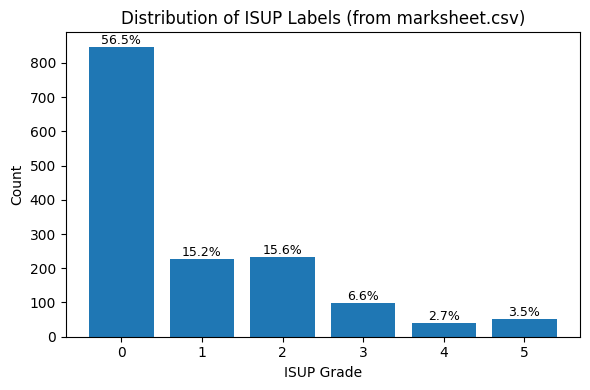

,ISUP,count,percent
0,0,847,56.5
1,1,228,15.2
2,2,234,15.6
3,3,99,6.6
4,4,40,2.7
5,5,52,3.5


In [2]:
# --- Extra: Plot distribution of ISUP labels in marksheet.csv ---

import numpy as np
import matplotlib.pyplot as plt

# If you already have `df = pd.read_csv(CSV_PATH)` above, reuse it.
# Otherwise, uncomment the next line:
# df = pd.read_csv(CSV_PATH)

col = "case_ISUP"
if col not in df.columns:
    raise ValueError(f"Column '{col}' not found in {CSV_PATH}. Available: {list(df.columns)}")

# Clean and coerce to numeric (handles strings/NaNs gracefully)
isup = pd.to_numeric(df[col], errors="coerce")

# Count by label; ensure sorted by label number (0..5 if present)
labels_sorted = sorted(isup.dropna().unique())
counts = isup.value_counts(dropna=True).reindex(labels_sorted, fill_value=0).astype(int)

# Percentages
total = counts.sum()
perc = (counts / total * 100).round(1)

# Bar chart
plt.figure(figsize=(6,4))
plt.bar(counts.index.astype(int), counts.values)
plt.title("Distribution of ISUP Labels (from marksheet.csv)")
plt.xlabel("ISUP Grade")
plt.ylabel("Count")
plt.xticks(counts.index.astype(int))
# annotate bars with percentages
for x, c in zip(counts.index, counts.values):
    plt.text(x, c, f"{(c/total*100):.1f}%", ha="center", va="bottom", fontsize=9)
plt.tight_layout()
plt.show()

# Optional: quick table (counts + %)
display(pd.DataFrame({"count": counts, "percent": perc}).rename_axis("ISUP").reset_index())
